In [0]:
!pip install xgboost

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


### Data Collection & Analysis

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:
mart_df = pd.read_csv("file:/Workspace/Users/prashant.aghara@kroger.com/linear-regression/bigmart.csv")

In [0]:
mart_df.shape

(8523, 12)

In [0]:
mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Categorical Features
1. Item_Identifier
2. Item_Fat_Content
3. Item_Type
4. Outlet_Identifier
5. Outlet_Size
6. Outlet_Location_Type
7. Outlet_Type

In [0]:
# Missing values
mart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Handling Missing Values
- Mean - Avg Values
- Mode - Most Repeated Values

In [0]:
weight = mart_df['Item_Weight']
weight_mean = weight.mean()
print(weight_mean)
mart_df.Item_Weight.fillna(weight_mean, inplace=True)

12.857645184135976


In [0]:
mart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
outlet_size = mart_df['Outlet_Size'].isnull()
mode_of_outlet_size = mart_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [0]:
mode_of_outlet_size.display()

print(outlet_size)

Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Small,Small,Medium,Medium


0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [0]:
mart_df.loc[outlet_size, 'Outlet_Size'] = mart_df.loc[outlet_size, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
mart_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [0]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
mart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Numerical Feature's Plots

In [0]:
sns.set()

In [0]:
def plot_distribution(column):
  plt.figure(figsize=(3,3))
  sns.histplot(mart_df[column])
  plt.show()
  print()

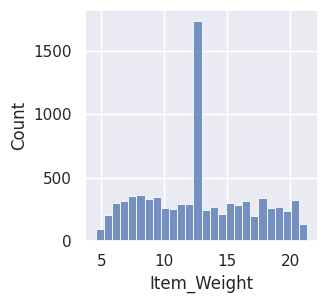

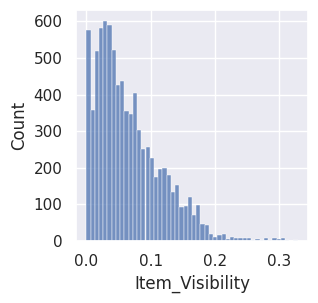

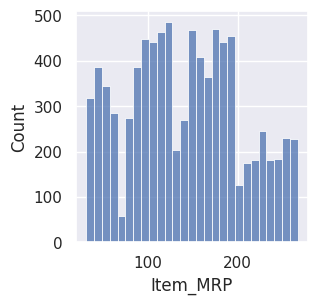

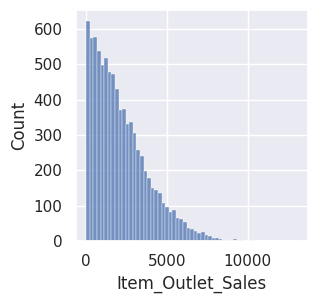

In [0]:
plot_distribution('Item_Weight')
plot_distribution('Item_Visibility')
plot_distribution('Item_MRP')
plot_distribution('Item_Outlet_Sales')

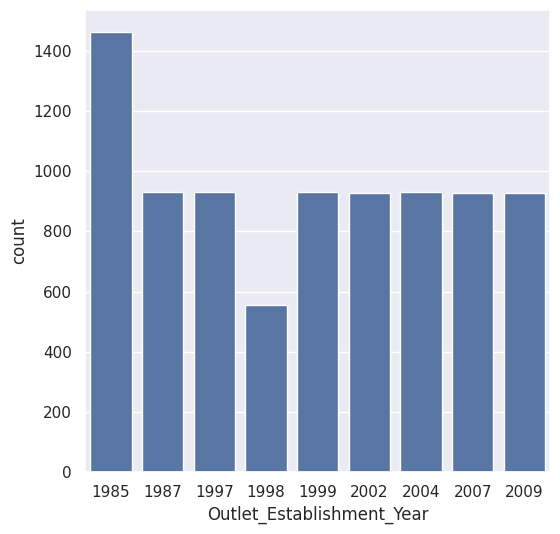

In [0]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data=mart_df)
plt.show()

#### Categorical Features

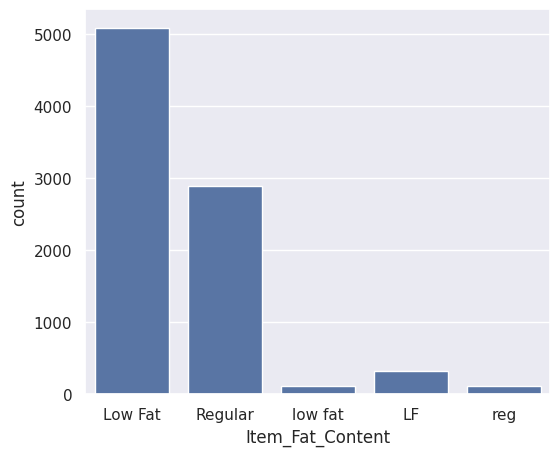

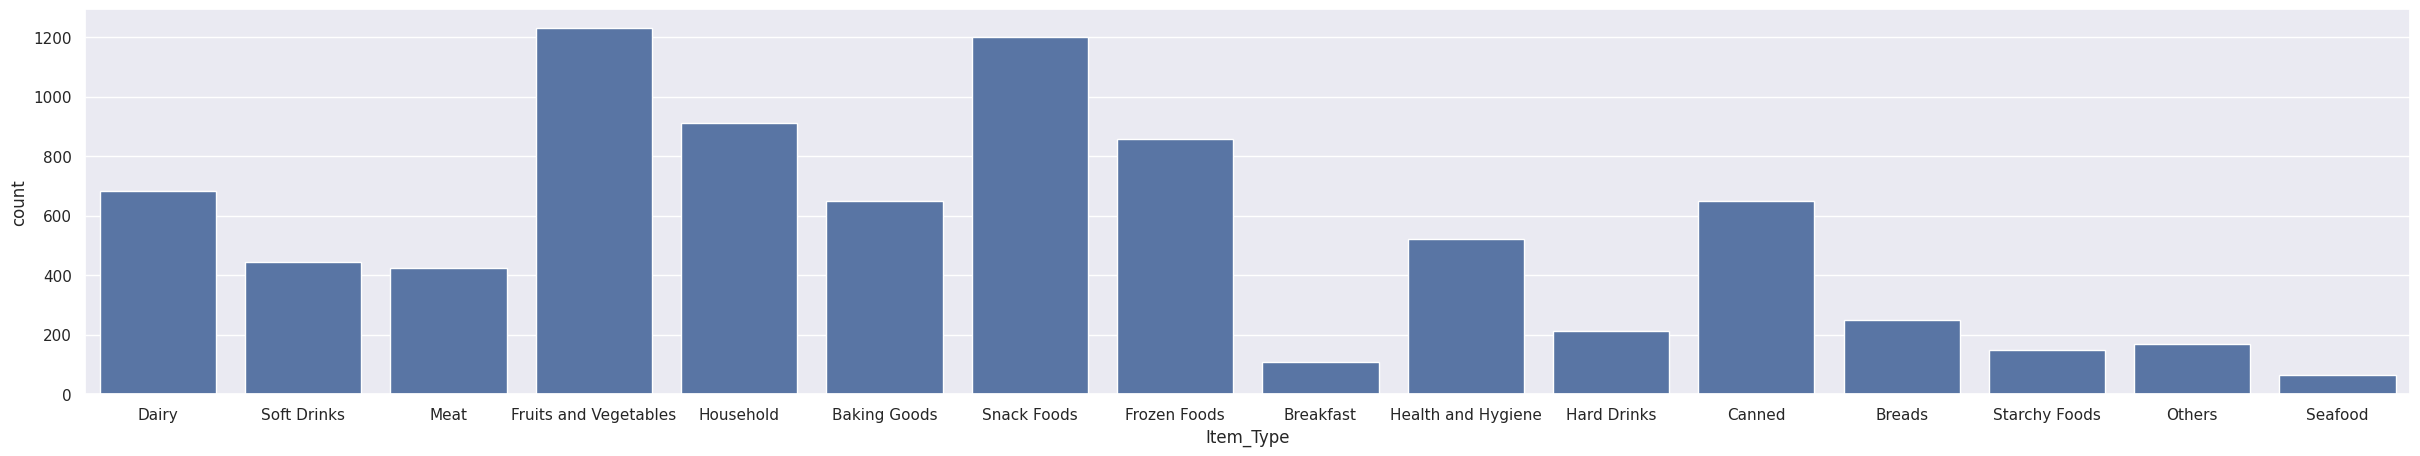

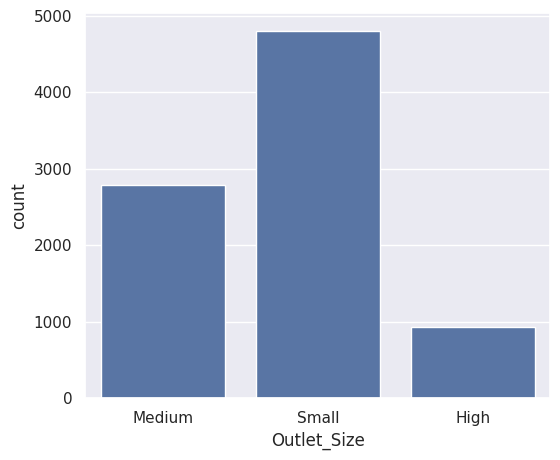

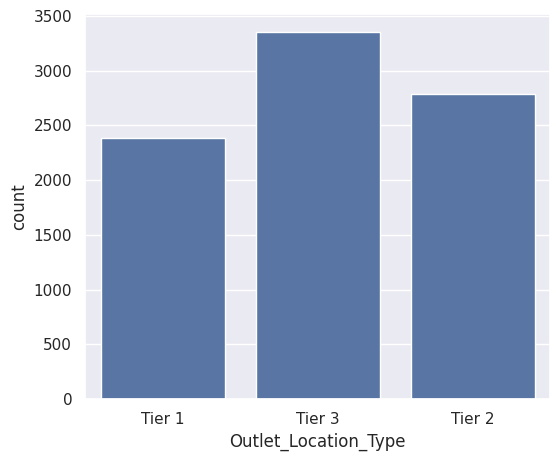

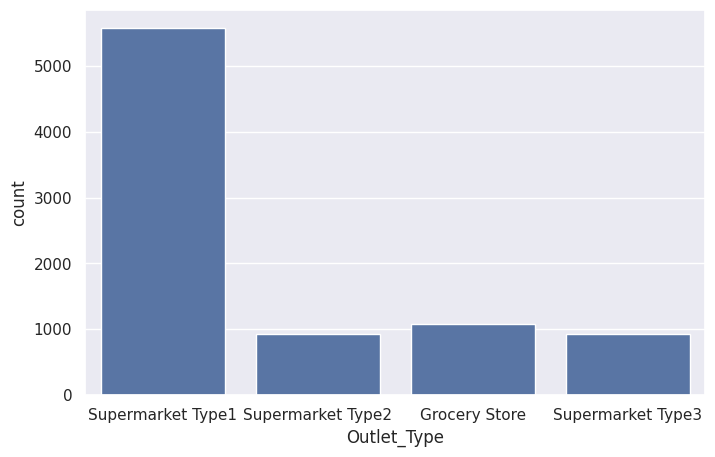

In [0]:
def count_plot(column, x_axis):
  plt.figure(figsize=(x_axis,5))
  sns.countplot(x = column, data=mart_df)
  plt.show()
  print()

count_plot('Item_Fat_Content', 6)
count_plot('Item_Type', 30)
count_plot('Outlet_Size', 6)
count_plot('Outlet_Location_Type', 6)
count_plot('Outlet_Type', 8)

In [0]:
mart_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [0]:
mart_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace=True)

In [0]:
mart_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Label Encoding

In [0]:
encoder = LabelEncoder()

In [0]:
mart_df['Item_Identifier'] = encoder.fit_transform(mart_df['Item_Identifier'])
mart_df['Item_Fat_Content'] = encoder.fit_transform(mart_df['Item_Fat_Content'])
mart_df['Item_Type'] = encoder.fit_transform(mart_df['Item_Type'])
mart_df['Outlet_Identifier'] = encoder.fit_transform(mart_df['Outlet_Identifier'])
mart_df['Outlet_Size'] = encoder.fit_transform(mart_df['Outlet_Size'])
mart_df['Outlet_Location_Type'] = encoder.fit_transform(mart_df['Outlet_Location_Type'])
mart_df['Outlet_Type'] = encoder.fit_transform(mart_df['Outlet_Type'])
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Model Running

In [0]:
X = mart_df.drop(['Item_Outlet_Sales'], axis=1) 
Y = mart_df['Item_Outlet_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [0]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [0]:
# Prediction on Training data
train_pred = model.predict(X_train)

In [0]:
# Prediction on Test data
test_pred = model.predict(X_test)

In [0]:
r_squared_train = metrics.r2_score(Y_train, train_pred)
print("R squared on training data: ", r_squared_train)

R squared on training data:  0.882813065030219


In [0]:
r_squared_test = metrics.r2_score(Y_test, test_pred)
print("R squared on test data: ", r_squared_test)

R squared on test data:  0.5255027246999872


#### Linear Regression Model

In [0]:
linear_regression_model = LinearRegression()

In [0]:
linear_regression_model.fit(X_train, Y_train)

🏃 View run grandiose-pig-942 at: https://adb-7590276503789327.7.azuredatabricks.net/ml/experiments/1185911635093652/runs/03c51cdff16546e095410857ecdcd6a1
🧪 View experiment at: https://adb-7590276503789327.7.azuredatabricks.net/ml/experiments/1185911635093652


LinearRegression()

In [0]:
# Prediction on Training data
train_pred = linear_regression_model.predict(X_train)

In [0]:
# Prediction on Test data
test_pred = model.predict(X_test)

In [0]:
r_squared_train = metrics.r2_score(Y_train, train_pred)
print("R squared on training data: ", r_squared_train)

R squared on training data:  0.5021402435501316


In [0]:
r_squared_test = metrics.r2_score(Y_test, test_pred)
print("R squared on test data: ", r_squared_test)

R squared on test data:  0.5255027246999872
